# EDA on 'Indian Premiere League'  Dataset

## Performing Exploratory Data Analysis on Indian Premiere League Data Set
 * Performing an exploratory data analysis (EDA) on the Indian Premier League (IPL) dataset, which consists of two main files: **'matches.csv'** and **"deliveries.csv"**. The analysis aimed to uncover key insights and trends related to team performances, player contributions, and match outcomes in the IPL.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Loading.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
matches_df = pd.read_csv("/content/drive/MyDrive/matches.csv")
deliveries_df = pd.read_csv('/content/drive/MyDrive/deliveries.csv')

In [7]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Summary of data.

In [9]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [10]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
matches_df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### Variables of given data.

In [ ]:
for col in matches_df.columns:
    print(col)

id
season
city
date
team1
team2
toss_winner
toss_decision
result
dl_applied
winner
win_by_runs
win_by_wickets
player_of_match
venue
umpire1
umpire2
umpire3


In [ ]:
for col in deliveries_df.columns:
    print(col)

match_id
inning
batting_team
bowling_team
over
ball
batsman
non_striker
bowler
is_super_over
wide_runs
bye_runs
legbye_runs
noball_runs
penalty_runs
batsman_runs
extra_runs
total_runs
player_dismissed
dismissal_kind
fielder


## Matches Dataset.

### Analyzing the most successful teams by the number of matches won.

In [ ]:
# Count the number of wins for each team
team_wins = matches_df['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']
team_wins

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


* By no of matches won,  **Mumbai Indians** is the most successful team followed by **Chennai Super Kings**.

### Team won by Maximum runs  and wickets.

In [ ]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [ ]:
matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### Analyzing the most impactful players by the number of "Player of the Match" awards.

In [ ]:
# Count the number of "Player of the Match" awards for each player
player_of_match_awards = matches_df['player_of_match'].value_counts().reset_index()
player_of_match_awards.columns = ['player', 'awards']
player_of_match_awards.head(10)
# Top 10 players based on POM awards

,player,awards
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


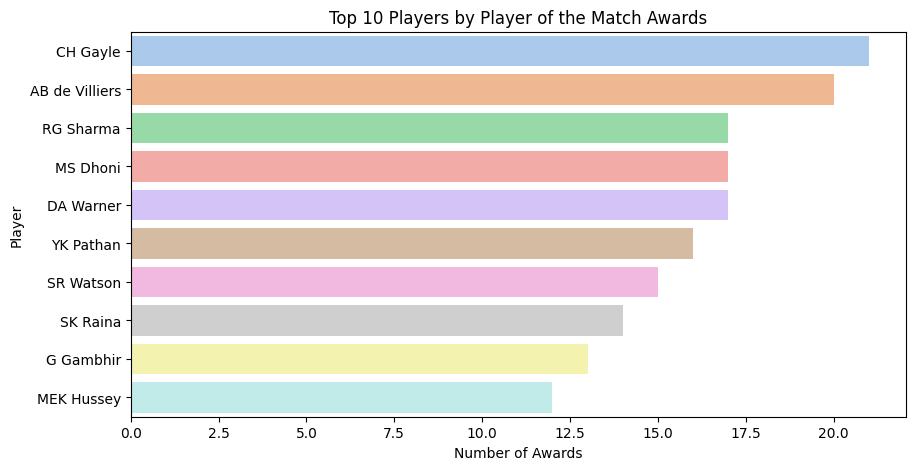

In [ ]:
# Calculating the top players based on "Player of the Match" awards
top_players = matches_df['player_of_match'].value_counts().head(10).reset_index()
top_players.columns = ['player', 'awards']

# Plotting the top players based on "Player of the Match" awards
plt.figure(figsize=(10, 5))
sns.barplot(x='awards', y='player', data=top_players, palette='pastel', legend=False)
plt.title('Top 10 Players by Player of the Match Awards')
plt.xlabel('Number of Awards')
plt.ylabel('Player')
plt.show()


* Most player of matches awards were achieved by **CH Gayle** followed by **AB de Villiers** and ***RG Sharma***.

### Analyzing the impact of toss decision on match result.

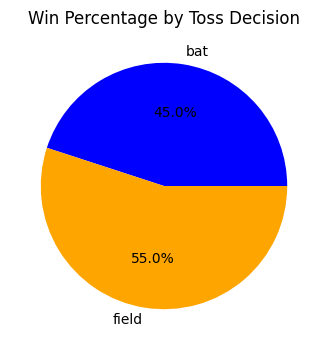

In [ ]:
# Creating a new column to indicate if the toss winner won the match
matches_df['toss_win_match_win'] = matches_df['toss_winner'] == matches_df['winner']

# Count the number of matches won by toss decision
toss_decision_win = matches_df.groupby('toss_decision')['toss_win_match_win'].mean().reset_index()
toss_decision_win.columns = ['toss_decision', 'win_percentage']

toss_decision_win

# Plotting a pie chart to visualize the win percentages for each toss decision
plt.figure(figsize=(4,4))
plt.pie(toss_decision_win['win_percentage'], labels=toss_decision_win['toss_decision'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Win Percentage by Toss Decision')
plt.show()

### Plotting the margin of victory by runs and by wickets.

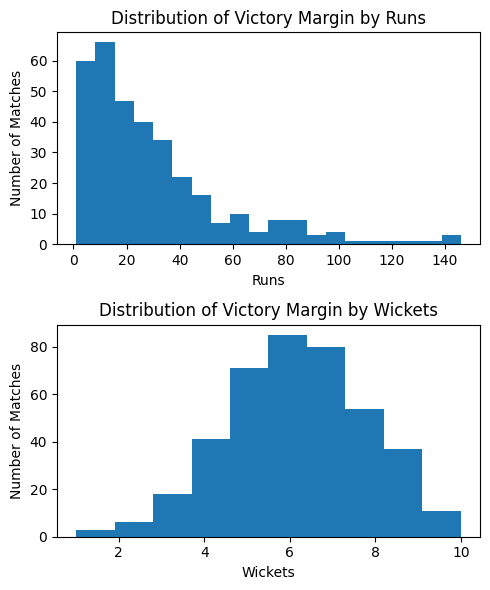

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(5,6))

# Histogram for win by runs
matches_df[matches_df['win_by_runs'] > 0]['win_by_runs'].plot(kind='hist', bins=20, ax=ax[0])
ax[0].set_title('Distribution of Victory Margin by Runs')
ax[0].set_xlabel('Runs')
ax[0].set_ylabel('Number of Matches')

# Histogram for win by wickets
matches_df[matches_df['win_by_wickets'] > 0]['win_by_wickets'].plot(kind='hist', bins=10, ax=ax[1])
ax[1].set_title('Distribution of Victory Margin by Wickets')
ax[1].set_xlabel('Wickets')
ax[1].set_ylabel('Number of Matches')

plt.tight_layout()
plt.show()

* The histograms show the distribution of victory margins in IPL matches, with most matches won by runs having a margin less than 40, and matches won by wickets having a margin typically between 5 to 8 wickets.

### Number of matches every season.

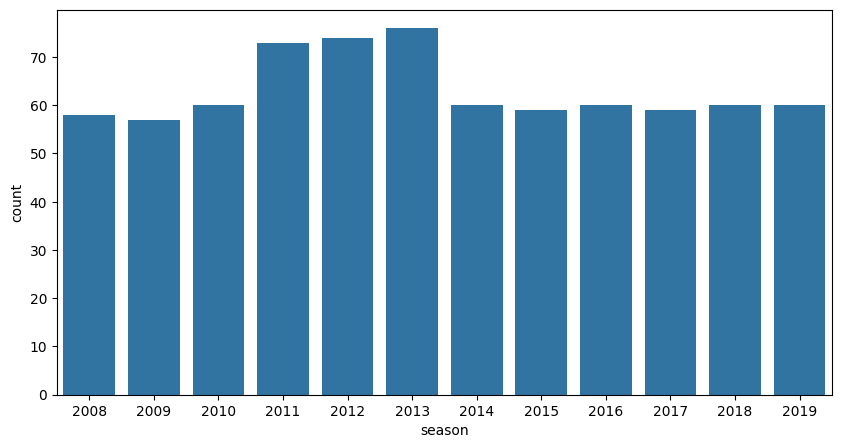

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=matches_df)
plt.show()

* Most matches were played in the season **2013**.

### Now let us see most common dismissal types in IPL.

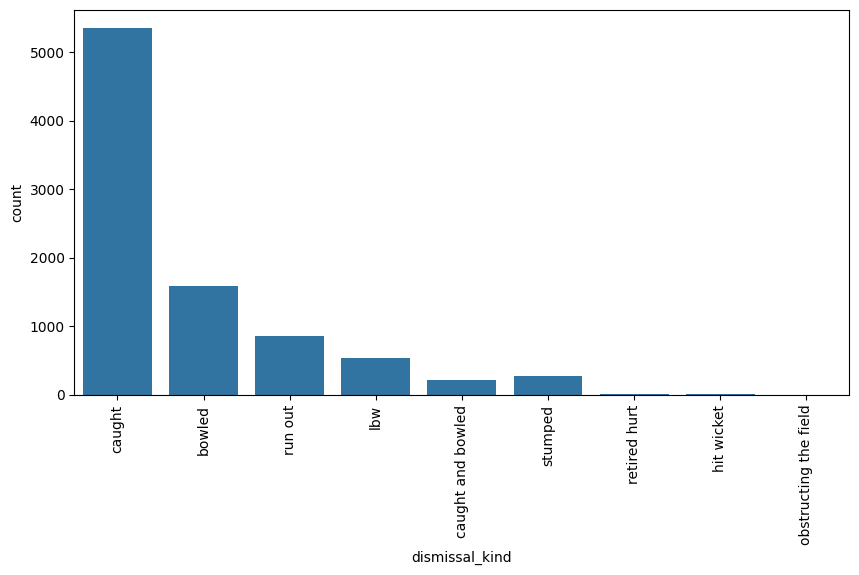

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='dismissal_kind', data=deliveries_df)
plt.xticks(rotation='vertical')
plt.show()

* Getting **Caught** is the most common dismissal_kind.

### Number of matches played at each venue for the top Venues.

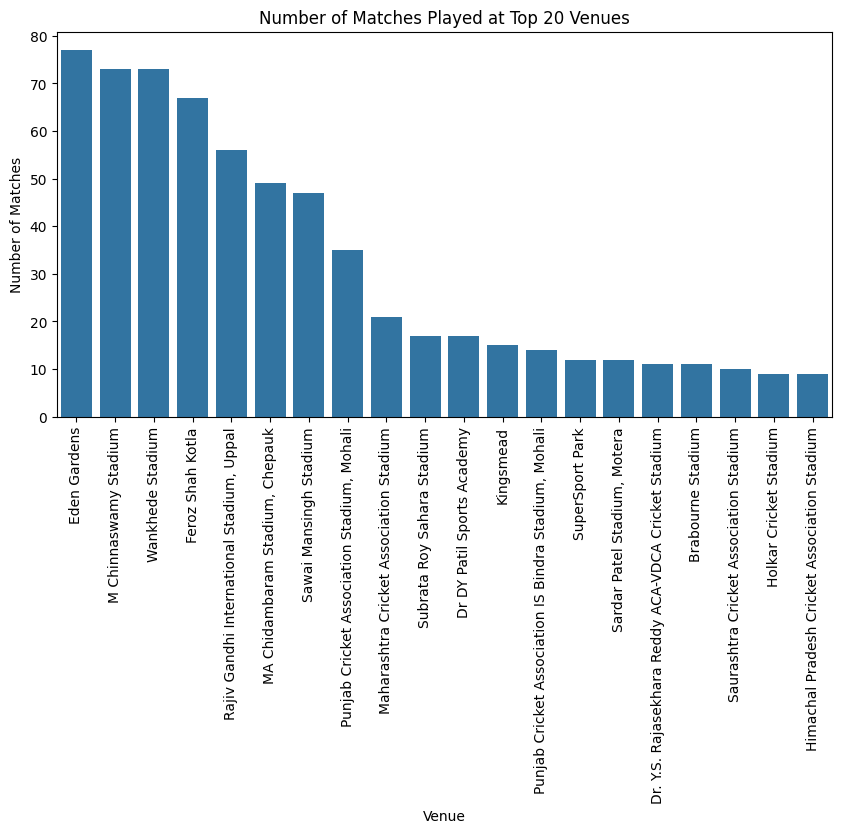

In [ ]:
top_venues = matches_df['venue'].value_counts().head(20).index
top_venues_df = matches_df[matches_df['venue'].isin(top_venues)]

# Plotting the number of matches played at the top 20 venues
plt.figure(figsize=(10, 5))
sns.countplot(x='venue', data=top_venues_df, order=top_venues)
plt.title('Number of Matches Played at Top 20 Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation="vertical")
plt.show()

* Most matches were played at **Eden gardens** followed by **M Chinnaswamy stadium** and ***Wankhede stadium***.

### Teams that played most number of matches.

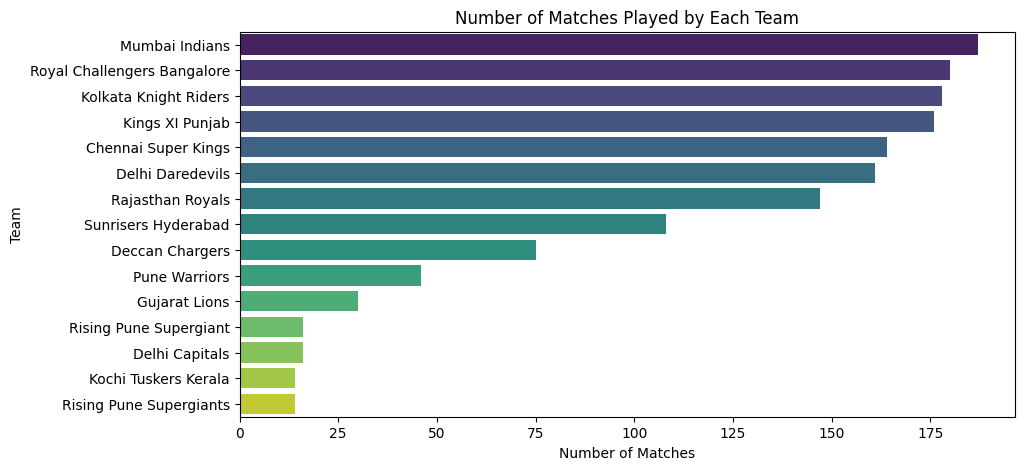

In [ ]:
temp_df = pd.melt(matches_df, id_vars=['id', 'season'], value_vars=['team1', 'team2'])
team_counts = temp_df['value'].value_counts().reset_index()
team_counts.columns = ['team', 'count']

# Plotting the teams in descending order of match counts
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='team', data=team_counts, palette='viridis',legend=False)
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Number of Matches')
plt.ylabel('Team')
plt.show()

* Most number of matches were played by **Mumbai Indians**.

### Number of wins for each team.

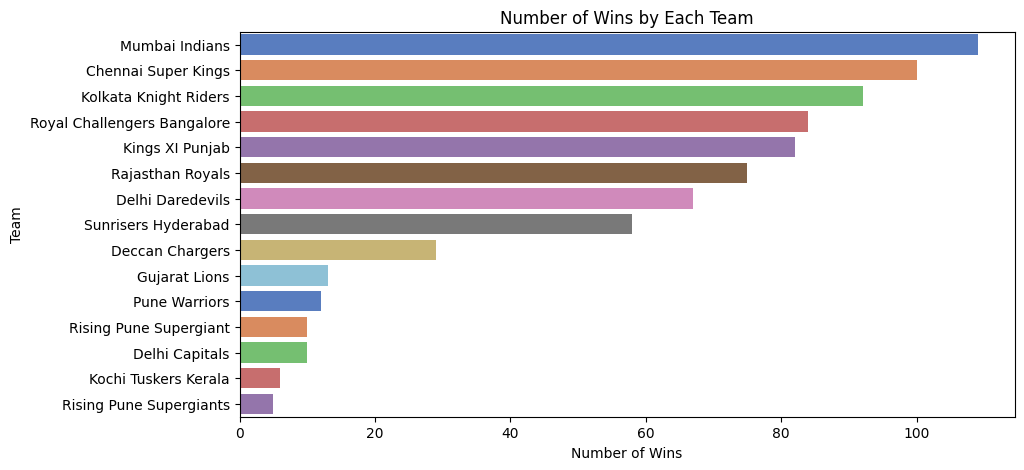

In [ ]:
team_wins = matches_df['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']

# Plotting the teams in descending order of wins
plt.figure(figsize=(10, 5))
sns.barplot(x='wins', y='team', data=team_wins, palette='muted')
plt.title('Number of Wins by Each Team')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()

* ***Mumbai Indians*** won the most number of matches followed by **Chennai super kings**.

### Year wise champions.

In [ ]:
champions_df = matches_df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champions_df.columns = ['season', 'champion']

champions_df


,season,champion
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


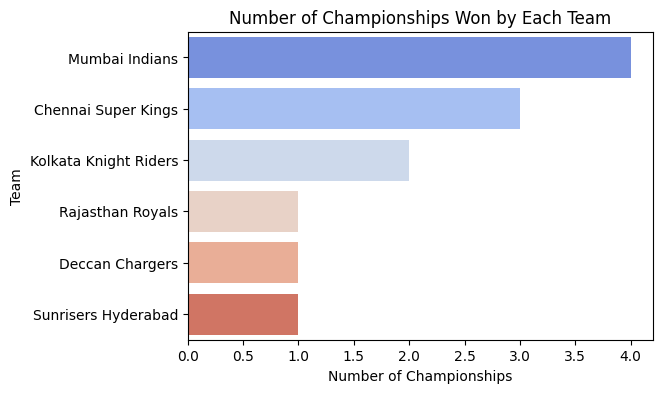

In [ ]:
champion_counts = champions_df['champion'].value_counts().reset_index()
champion_counts.columns = ['team', 'championships']

# Plotting the number of championships won by each team
plt.figure(figsize=(6, 4))
sns.barplot(x='championships', y='team', data=champion_counts, palette='coolwarm')
plt.title('Number of Championships Won by Each Team')
plt.xlabel('Number of Championships')
plt.ylabel('Team')
plt.show()

* **Mumbai Indians** won most number of Titles.

### Number of matches each umpire has umpired.

In [ ]:
# First, we need to consider both umpire1 and umpire2 columns
umpire1_matches = matches_df['umpire1'].value_counts().reset_index()
umpire2_matches = matches_df['umpire2'].value_counts().reset_index()

# Rename the columns for clarity
umpire1_matches.columns = ['umpire', 'matches']
umpire2_matches.columns = ['umpire', 'matches']

# Combine the counts from both columns
total_umpire_matches = pd.concat([umpire1_matches, umpire2_matches], ignore_index=True)

# Group by umpire and sum the matches
total_umpire_matches = total_umpire_matches.groupby('umpire')['matches'].sum().reset_index()
total_umpire_matches = total_umpire_matches.sort_values(by='matches', ascending=False)

total_umpire_matches.head(10)
# Getting the list of top 10 umpires

,umpire,matches
57,S Ravi,106
25,HDPK Dharmasena,87
18,C Shamshuddin,73
4,AK Chaudhary,58
61,SJA Taufel,55
38,M Erasmus,54
12,Asad Rauf,51
45,Nitin Menon,42
16,BR Doctrove,42
20,CK Nandan,41


* **S Ravi** appears to be the most sought-after umpire for IPL matches, followed by **HDPK Dharmasena**.

# Deliveries Data set

## Batsman analysis

### Top batsmen based on total runs scored.

In [ ]:
# Calculate total runs scored by each batsman
top_batsmen = deliveries_df.groupby('batsman')['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
top_batsmen.head(10)

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


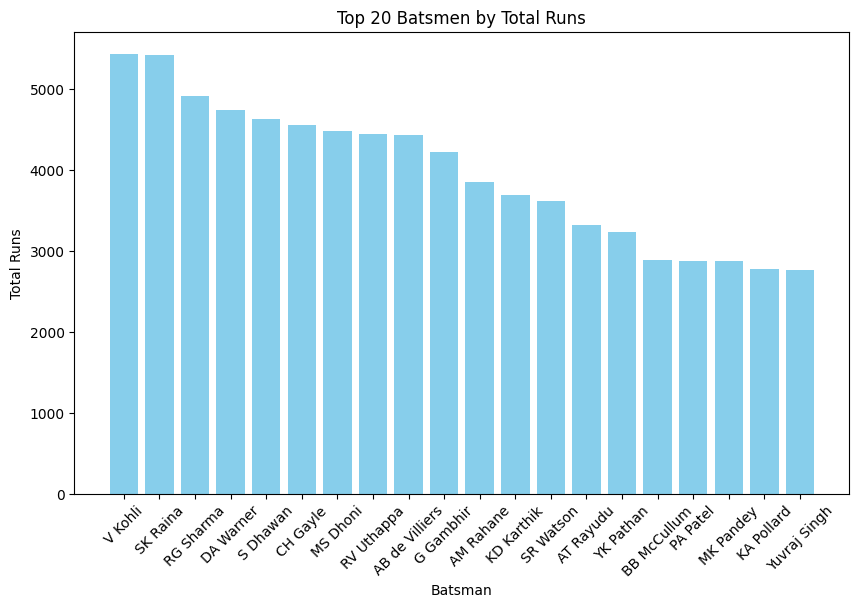

In [ ]:
# Plotting the top 20 batsmen
top_batsmen = deliveries_df.groupby('batsman')['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False).head(20).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(top_batsmen['batsman'], top_batsmen['batsman_runs'], color='skyblue')
plt.title('Top 20 Batsmen by Total Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

* **Virat Kohli** is the highest run getter in the tournament followed by **Suresh Raina** and ***Rohit Sharma***.

### Runs scored by Virat Kohli with seasons.

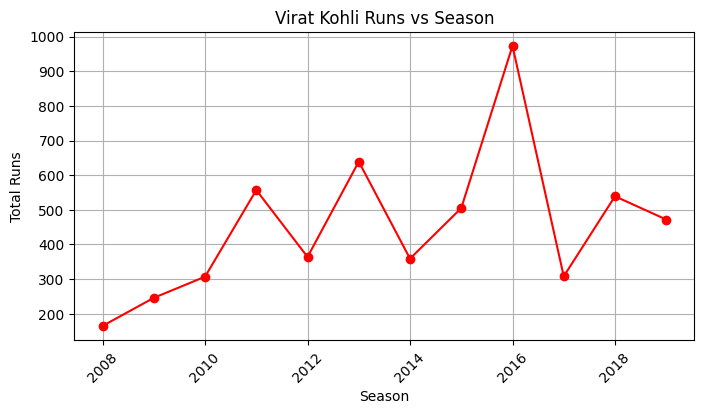

In [ ]:
# Filter the deliveries dataset for Virat Kohli
virat_kohli_deliveries = deliveries_df[deliveries_df['batsman'] == 'V Kohli']

# Merge with matches dataset to get the season information
virat_kohli_deliveries = virat_kohli_deliveries.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')

# Calculate the total runs scored by Virat Kohli in each season
virat_kohli_runs_per_season = virat_kohli_deliveries.groupby('season')['batsman_runs'].sum().reset_index()

# Plotting the total runs scored by Virat Kohli in each season
plt.figure(figsize=(8, 4))
plt.plot(virat_kohli_runs_per_season['season'], virat_kohli_runs_per_season['batsman_runs'], marker='o', linestyle='-', color='red')
plt.title('Virat Kohli Runs vs Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

 * **2016** Was the Peak year of **Virat Kohli** scoring **973** runs.

### Top batsmen based on the Strike Rate.

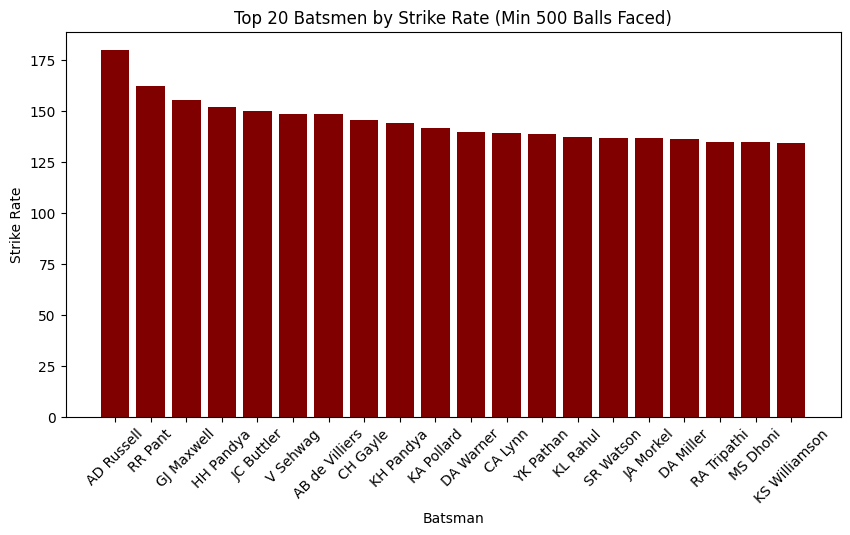

In [ ]:
# Calculate the total runs scored by each batsman
total_runs = deliveries_df.groupby('batsman')['batsman_runs'].sum().reset_index()
total_runs.columns = ['batsman', 'total_runs']

# Calculate the total balls faced by each batsman
total_balls = deliveries_df['batsman'].value_counts().reset_index()
total_balls.columns = ['batsman', 'total_balls']

# Merge the two dataframes
batsman_stats = pd.merge(total_runs, total_balls, on='batsman')

# Calculate the strike rate (runs per 100 balls)
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['total_balls']) * 100

# Filter out batsmen who have faced less than 500 balls
batsman_stats = batsman_stats[batsman_stats['total_balls'] >= 500]

# Sort by strike rate in descending order and select the top 20 batsmen
top_20_batsmen_strike_rate = batsman_stats.sort_values(by='strike_rate', ascending=False).head(20)

# Plotting the strike rates of the top 20 batsmen
plt.figure(figsize=(10, 5))
plt.bar(top_20_batsmen_strike_rate['batsman'], top_20_batsmen_strike_rate['strike_rate'], color='Maroon')
plt.title('Top 20 Batsmen by Strike Rate (Min 500 Balls Faced)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()

* **Andre Russel** has the best Strike Rate followed by ***Rishabh Pant*** and **Glenn Maxwell**.

### Top batsmen based on the number of boundaries (4s).

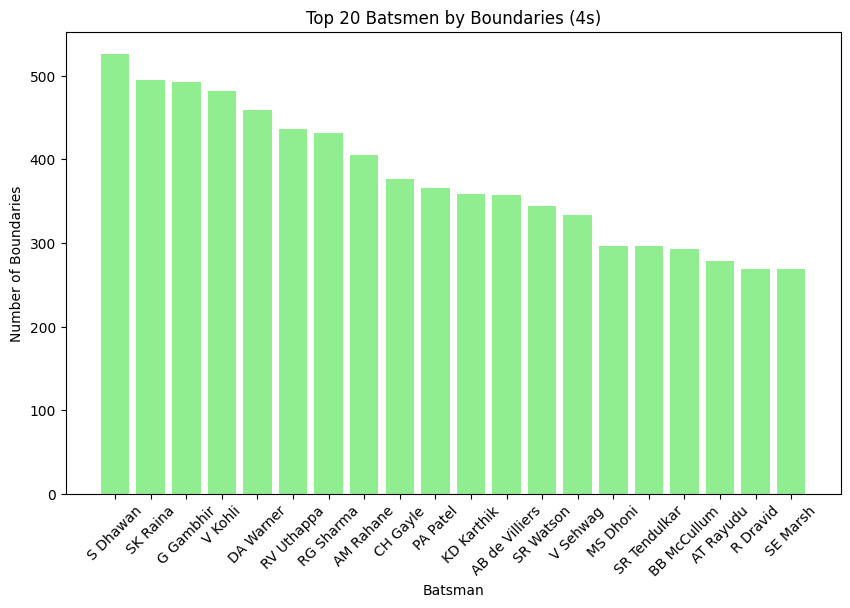

In [ ]:
# Most number of boundaries (4s)
boundaries = deliveries_df[deliveries_df['batsman_runs'] == 4]
top_boundaries = boundaries['batsman'].value_counts().head(20).reset_index()
top_boundaries.columns = ['batsman', 'boundaries']

# Plotting the top batsmen based on boundaries
plt.figure(figsize=(10, 6))
plt.bar(top_boundaries['batsman'], top_boundaries['boundaries'], color='lightgreen')
plt.title('Top 20 Batsmen by Boundaries (4s)')
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries')
plt.xticks(rotation=45)
plt.show()

* ***Shikhar Dhawan*** scored most number of Boundaries (4's) followed by **Suresh Raina** and **Gautam Gambhir**.

### Top batsmen based on the number of sixers (6s).

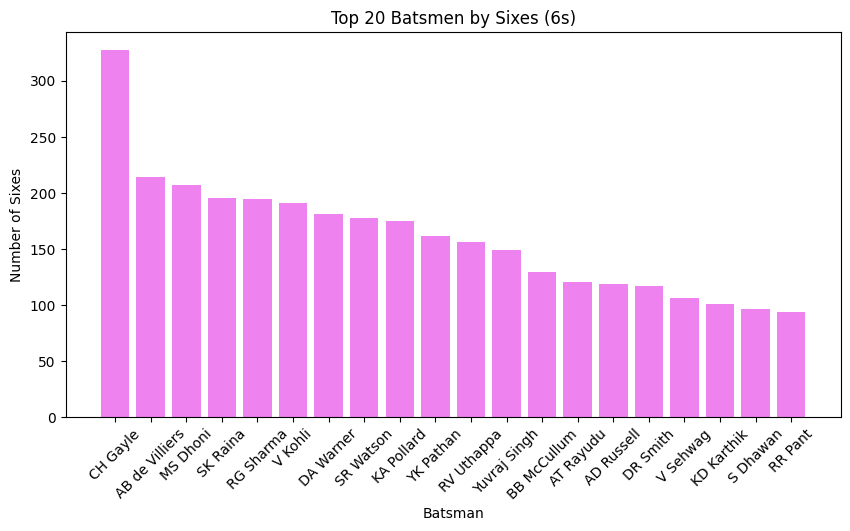

In [ ]:
# Most number of sixes (6s)
sixes = deliveries_df[deliveries_df['batsman_runs'] == 6]
top_sixes = sixes['batsman'].value_counts().head(20).reset_index()
top_sixes.columns = ['batsman', 'sixes']
top_boundaries,top_sixes

# Plotting the top batsmen based on sixes
plt.figure(figsize=(10,5))
plt.bar(top_sixes['batsman'], top_sixes['sixes'], color='violet')
plt.title('Top 20 Batsmen by Sixes (6s)')
plt.xlabel('Batsman')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=45)
plt.show()

* **Christopher Henry Gayle** scored most number of sixes followed by **AB de villiers**.

### Calculate the top batsmen based on the number of dot balls faced.

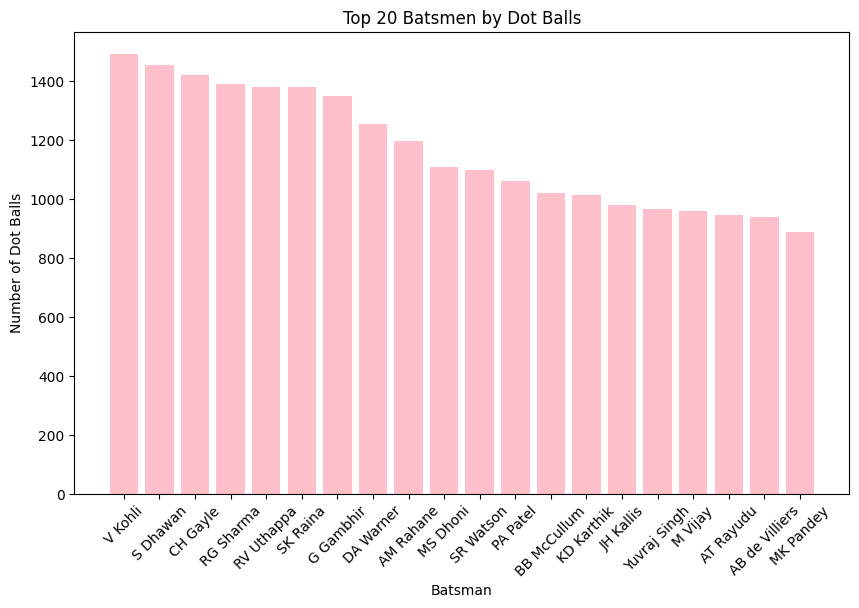

In [ ]:
# Most number of dot balls
dot_balls = deliveries_df[deliveries_df['batsman_runs'] == 0]
top_dot_balls = dot_balls['batsman'].value_counts().head(20).reset_index()
top_dot_balls.columns = ['batsman', 'dot_balls']

# Plotting the top batsmen based on dot balls
plt.figure(figsize=(10, 6))
plt.bar(top_dot_balls['batsman'], top_dot_balls['dot_balls'], color='pink')
plt.title('Top 20 Batsmen by Dot Balls')
plt.xlabel('Batsman')
plt.ylabel('Number of Dot Balls')
plt.xticks(rotation=45)
plt.show()

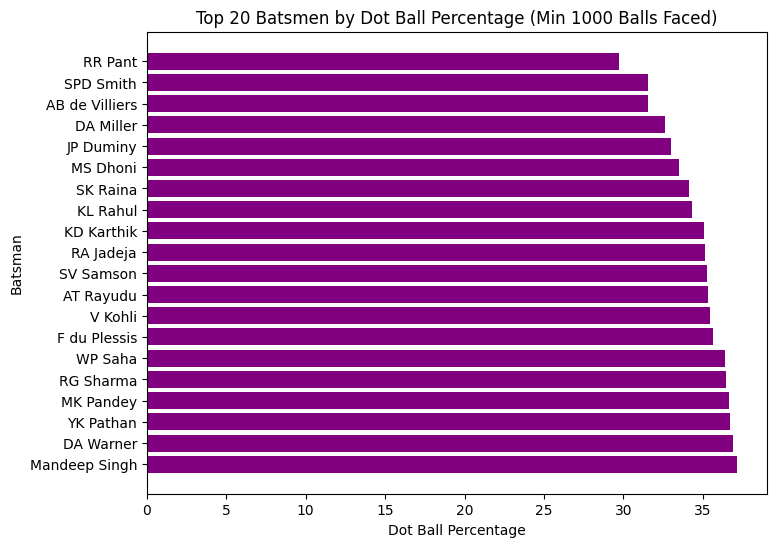

In [ ]:
# Calculate the total balls faced by each batsman
total_balls_faced = deliveries_df['batsman'].value_counts().reset_index()
total_balls_faced.columns = ['batsman', 'total_balls']

total_balls_faced = total_balls_faced[total_balls_faced['total_balls'] >= 1000]

dot_balls_faced = deliveries_df[deliveries_df['batsman_runs'] == 0]['batsman'].value_counts().reset_index()
dot_balls_faced.columns = ['batsman', 'dot_balls']

# Merge the two dataframes
batsman_dot_ball_percentage = pd.merge(total_balls_faced, dot_balls_faced, on='batsman', how='left')
batsman_dot_ball_percentage['dot_ball_percentage'] = (batsman_dot_ball_percentage['dot_balls'] / batsman_dot_ball_percentage['total_balls']) * 100

batsman_dot_ball_percentage = batsman_dot_ball_percentage.sort_values(by='dot_ball_percentage').reset_index(drop=True)
top_20_batsmen = batsman_dot_ball_percentage.head(20)

# Plotting the top 20 batsmen based on dot ball percentage
plt.figure(figsize=(8, 6))
plt.barh(top_20_batsmen['batsman'], top_20_batsmen['dot_ball_percentage'], color='purple')
plt.title('Top 20 Batsmen by Dot Ball Percentage (Min 1000 Balls Faced)')
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Batsman')
plt.gca().invert_yaxis()
plt.show()

## Bowlers Analysis

### Top bowlers based on total wickets taken.

In [11]:
wickets = deliveries_df[deliveries_df['dismissal_kind'].notnull() & (deliveries_df['dismissal_kind'] != 'run out')]
top_bowlers = wickets['bowler'].value_counts().head(10).reset_index()
top_bowlers.columns = ['bowler', 'wickets']
top_bowlers.head(10)

,bowler,wickets
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


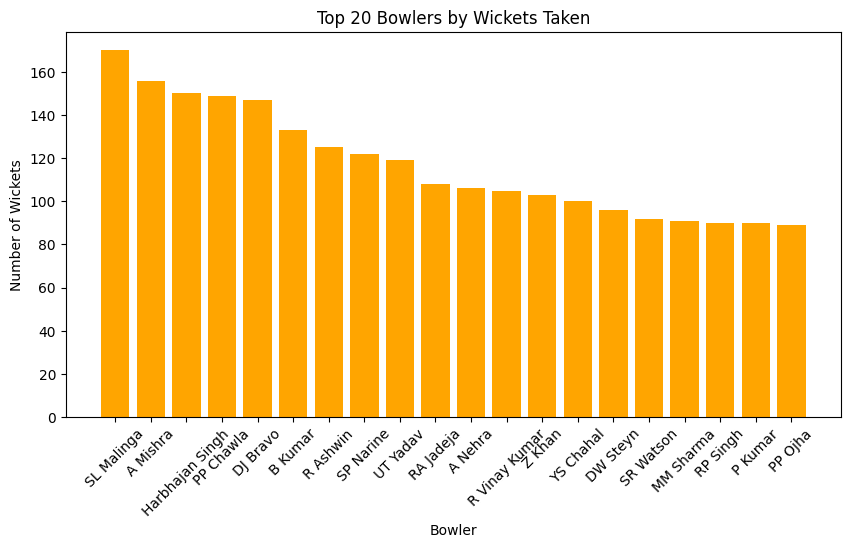

In [12]:
# Calculate the top bowlers based on the number of wickets taken
wickets = deliveries_df[deliveries_df['dismissal_kind'].notnull() & (deliveries_df['dismissal_kind'] != 'run out')]
top_bowlers = wickets['bowler'].value_counts().head(20).reset_index()
top_bowlers.columns = ['bowler', 'wickets']

# Plotting the top bowlers based on wickets taken
plt.figure(figsize=(10, 5))
plt.bar(top_bowlers['bowler'], top_bowlers['wickets'], color='orange')
plt.title('Top 20 Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)
plt.show()

* **SL Malinga** is the leading wicket taker followed by **Amit Mishra** and **Harbhajan Singh**.

### Wickets take by SL Malinga with seasons.

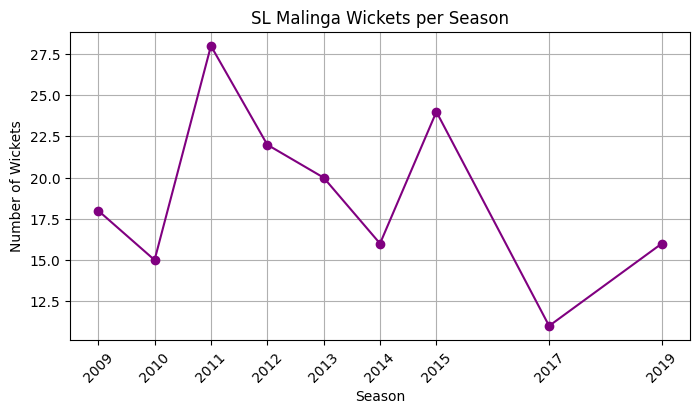

In [13]:
# Merge deliveries with matches to get the season for each delivery
merged_df = deliveries_df.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')

# Filter deliveries dataset for SL Malinga and dismissals
malinga_wickets = merged_df[(merged_df['bowler'] == 'SL Malinga') & (merged_df['dismissal_kind'].notnull()) & (merged_df['dismissal_kind'] != 'run out')]

# Group by season and count the number of wickets
malinga_wickets_per_season = malinga_wickets.groupby('season')['dismissal_kind'].count().reset_index()
malinga_wickets_per_season.columns = ['season', 'wickets']

# Plotting the number of wickets taken by SL Malinga per season
plt.figure(figsize=(8, 4))
plt.plot(malinga_wickets_per_season['season'], malinga_wickets_per_season['wickets'], marker='o', linestyle='-', color='purple')
plt.title('SL Malinga Wickets per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wickets')
plt.xticks(malinga_wickets_per_season['season'].unique(), rotation=45)
plt.grid(True)
plt.show()


* **2011** was the Peak Year for **Malinga** ,taking **28 Wickets**.

### Top bowlers based on the total number of balls bowled.

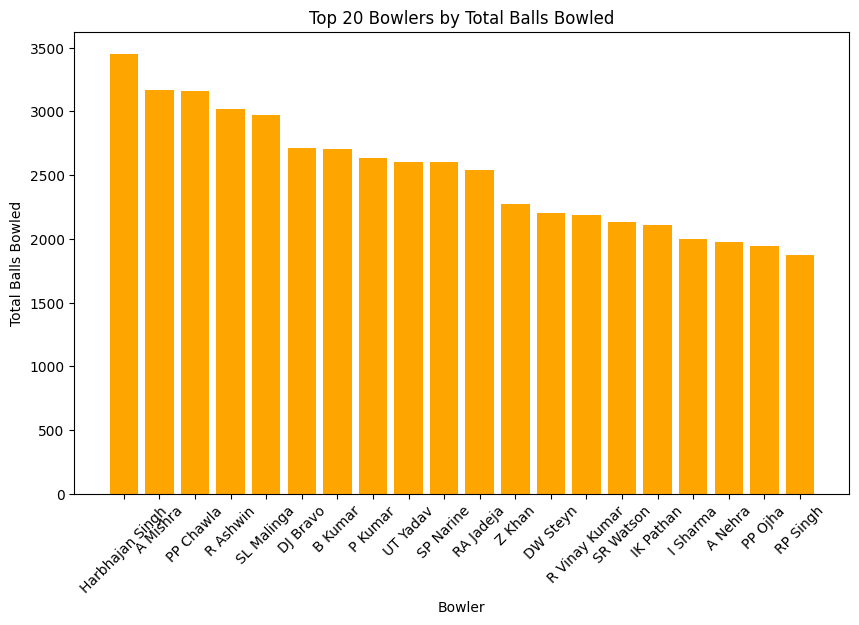

In [14]:
total_balls_bowled = deliveries_df['bowler'].value_counts().reset_index()
total_balls_bowled.columns = ['bowler', 'total_balls_bowled']

# Select the top 10 bowlers by total balls bowled
top_bowlers = total_balls_bowled.head(20)

# Plotting the top bowlers based on total balls bowled
plt.figure(figsize=(10, 6))
plt.bar(top_bowlers['bowler'], top_bowlers['total_balls_bowled'], color='orange')
plt.title('Top 20 Bowlers by Total Balls Bowled')
plt.xlabel('Bowler')
plt.ylabel('Total Balls Bowled')
plt.xticks(rotation=45)
plt.show()

* **Harbhajan Singh** Bowled most no of balls followed by **Amit Mishra** and ***Piyush Chawla***.

### Top bowlers based on the number of dot balls bowled.

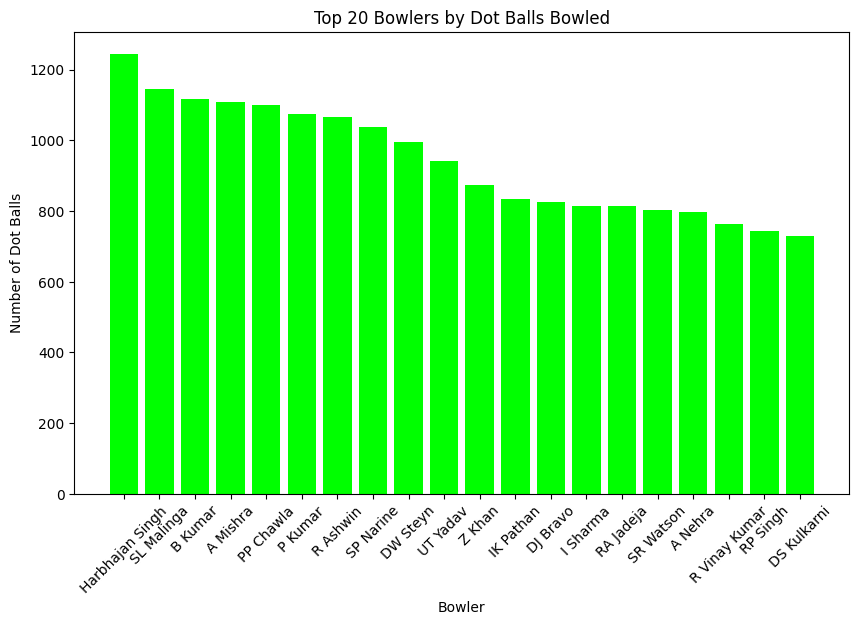

In [15]:
# Most number of dot balls bowled
dot_balls_bowled = deliveries_df[deliveries_df['total_runs'] == 0]
top_dot_balls_bowled = dot_balls_bowled['bowler'].value_counts().head(20).reset_index()
top_dot_balls_bowled.columns = ['bowler', 'dot_balls']

# Plotting the top bowlers based on dot balls bowled
plt.figure(figsize=(10, 6))
plt.bar(top_dot_balls_bowled['bowler'], top_dot_balls_bowled['dot_balls'], color='lime')
plt.title('Top 20 Bowlers by Dot Balls Bowled')
plt.xlabel('Bowler')
plt.ylabel('Number of Dot Balls')
plt.xticks(rotation=45)
plt.show()

* **Harbhajan Singh** Bowled the most number of dot balls followed by **Malinga** and ***Bhuvneshwar Kumar***.

### Calculate the top bowlers based on the number of extras bowled.

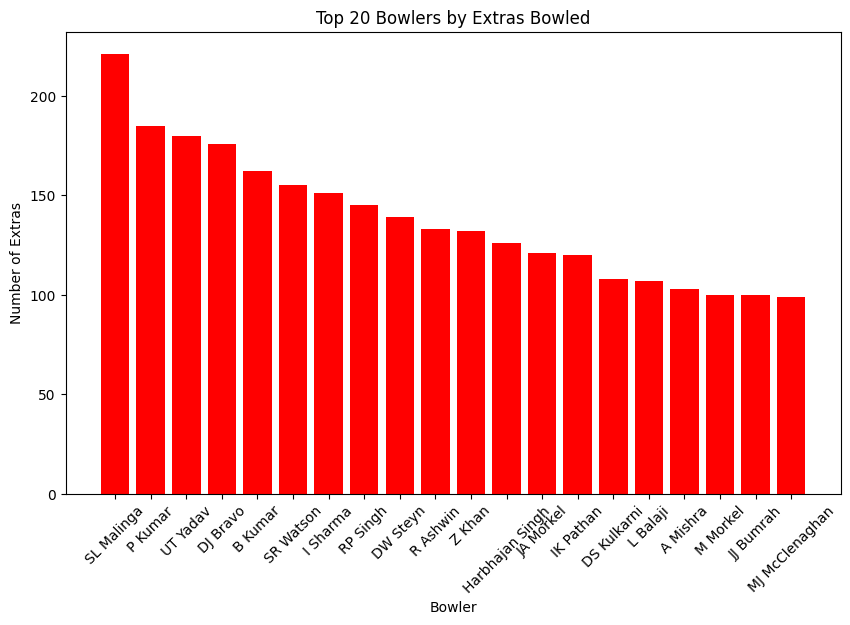

In [17]:
# Most number of extras bowled
extras_bowled = deliveries_df[deliveries_df['extra_runs'] > 0]
top_extras_bowled = extras_bowled['bowler'].value_counts().head(20).reset_index()
top_extras_bowled.columns = ['bowler', 'extras']

# Plotting the top bowlers based on extras bowled
plt.figure(figsize=(10, 6))
plt.bar(top_extras_bowled['bowler'], top_extras_bowled['extras'], color='red')
plt.title('Top 20 Bowlers by Extras Bowled')
plt.xlabel('Bowler')
plt.ylabel('Number of Extras')
plt.xticks(rotation=45)
plt.show()

* **Malinga** bowled most number of extras followed by **Praveen Kumar** and **Umesh Yadav**.

### Conclusion
Throughout the notebook, various visualizations such as **Bar Charts**, **Line Graphs**, and **Pie Charts** were used to illustrate key insights.These visualizations help in understanding the dynamics of the IPL, player performances, and match strategies.

  The EDA provided a detailed look into the IPL, highlighting standout performances by teams and players, and revealing patterns and trends that can influence match outcomes.